# Downloading and reading the Dataset

## Reading the Dataset

In [1]:
import pandas as pd
import seaborn as sns

csv_file_path = 'data.csv'

df = pd.read_csv(csv_file_path)
initial_df=df
df


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Label
0,5331-RGMTT,Male,1.0,Yes,No,54.0,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),99.05,5295.70,No
1,5161-XEUVX,Male,0.0,Yes,No,37.0,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,94.30,3460.95,No
2,0336-PIKEI,Male,1.0,Yes,No,72.0,Yes,No,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Bank transfer (automatic),74.40,5360.75,No
3,3345-PBBFH,Male,0.0,Yes,No,8.0,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),49.55,393.45,No
4,5067-XJQFU,Male,1.0,Yes,Yes,66.0,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,108.45,7076.35,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229985,4785-FCIFB,Female,0.0,Yes,No,61.0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,24.40,1417.90,No
229986,7161-DFHUF,Female,0.0,Yes,No,71.0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,23.85,1672.10,No
229987,8409-WQJUX,Female,0.0,No,No,25.0,No,No phone service,DSL,No,...,Yes,Yes,Yes,Yes,One year,No,Electronic check,54.20,1423.15,No
229988,4821-SJHJV,Female,0.0,Yes,Yes,32.0,Yes,Yes,Fiber optic,Yes,...,No,No,Yes,No,Month-to-month,No,Electronic check,89.60,2901.80,No


## Define functions

In [2]:
import pandas as pd
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Initialize a list to store results
results_list = []

def logistic_regression_cv(df, target_label):
    # Drop duplicates and NaN values
    df = df.drop_duplicates().dropna()

    # Apply LabelEncoder to the entire DataFrame
#    df_encoded = df.apply(LabelEncoder().fit_transform)

    # Features and target variable
 # Apply LabelEncoder to the entire DataFrame
    df_encoded =df.apply(LabelEncoder().fit_transform)

   
      # Features and target variable
    X = df_encoded.drop("Label", axis=1)
    y = df_encoded["Label"]
     # Split the dataset for cross-validation
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    
      # Fit the model on the entire training set for evaluation
    logmodel = LogisticRegression()
    logmodel.fit(X_train, Y_train)
    
     # Make predictions on the test set
    predictions = logmodel.predict(X_test)
     # Evaluate the model on the test set
    test_accuracy = accuracy_score(Y_test, predictions)
    
    # Create a pipeline with Logistic Regression model
    model = Pipeline([
        ('classifier', LogisticRegression(random_state=42, max_iter=1000))  # Set max_iter to a higher value
    ])


    # Fit and test the model using 5-fold cross-validation
    try:
        cv_scores = cross_val_score(model, X_train, Y_train, cv=5, error_score='raise')
    except Exception as e:
        print(f"Error during cross-validation: {e}")
        return None, None


    # Save the results
    results_list.append({
        'Target Label': target_label,
        'Cross-Validation Scores': cv_scores,
        'Test Accuracy': test_accuracy
   })

    return cv_scores, test_accuracy


# Preprocessing

* You have been asked to implement appropriate preprocessing to enhance the model's performance.

In [3]:
def deduplication(df):
    df=df.drop_duplicates()
    return df

In [4]:
column_names = list(df.columns)
for i in column_names:
    flage=df[i].isna().any()
    print(i)

customerID
gender
SeniorCitizen
Partner
Dependents
tenure
PhoneService
MultipleLines
InternetService
OnlineSecurity
OnlineBackup
DeviceProtection
TechSupport
StreamingTV
StreamingMovies
Contract
PaperlessBilling
PaymentMethod
MonthlyCharges
TotalCharges
Label


In [5]:
def DeleteRowMoreMissingValue(df):
    a=df.dropna(thresh=14)
    return a

In [6]:
def fillMisingValueWithMean(df):
    deep_copy = df.copy()
    deep_copy = deep_copy.drop(columns=['Label'])
    column_names = list(deep_copy.columns)
    for i in column_names:
        if deep_copy[i].dtypes=="float64" and  not(i == "SeniorCitizen"):
            print(i)
            deep_copy[i] = deep_copy[i].fillna(deep_copy[i].mean())
            data=list(deep_copy[i])
            for j in range(len(data)):
                if data[j]<0:
                    data[j]=df[i].mean()
    deep_copy[i]=data
    deep_copy.insert(20, "Label",df["Label"])
    return deep_copy
    

In [7]:
def fillMissingValueWithMode(df):
    deep_copy = df.copy(deep=True)
    column_names = list(df.columns)
    for i in column_names:
        if deep_copy[i].dtypes=="O"or i=="SeniorCitizen":
            most_frequent_category = deep_copy[i].mode()[0]
            deep_copy[i].fillna(most_frequent_category, inplace=True)
    return deep_copy         

In [8]:
def modifyCatToNum(df):
    deep_copy = df.copy(deep=True)
    column_names = list(df.columns)
    for i in column_names:
        if deep_copy[i].dtypes=="O" and not(i=="Label") and not(i=="customerID"):
            le = LabelEncoder()
            deep_copy[i] = le.fit_transform(deep_copy[i]) 
    return deep_copy        

In [9]:
def normalization(df):
    from sklearn.preprocessing import minmax_scale
    import numpy as np
    
    df["TotalCharges"] = minmax_scale(df["TotalCharges"])
    df["tenure"] = minmax_scale(df["tenure"])
    return df

In [10]:
def preProcessing():
    df1=deduplication(df)
    df2=DeleteRowMoreMissingValue(df1)
    df3=fillMisingValueWithMean(df2)
    df4=fillMissingValueWithMode(df3)
    df5=modifyCatToNum(df4)
    df6=normalization(df5)
    
    return df6

In [11]:
df.dtypes

customerID           object
gender               object
SeniorCitizen       float64
Partner              object
Dependents           object
tenure              float64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Label                object
dtype: object

In [12]:
deduplication(df)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Label
0,5331-RGMTT,Male,1.0,Yes,No,54.0,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),99.05,5295.70,No
1,5161-XEUVX,Male,0.0,Yes,No,37.0,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,94.30,3460.95,No
2,0336-PIKEI,Male,1.0,Yes,No,72.0,Yes,No,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Bank transfer (automatic),74.40,5360.75,No
3,3345-PBBFH,Male,0.0,Yes,No,8.0,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),49.55,393.45,No
4,5067-XJQFU,Male,1.0,Yes,Yes,66.0,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,108.45,7076.35,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229256,8587-XYZSFcsas,NaN,0.0,No,No,67.0,Yes,No,DSL,No,...,NaN,Yes,No,No,Two year,No,NaN,50.55,3260.10,No
229329,2654-VBVPB,Female,0.0,No,No,1.0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),19.90,19.90,No
229614,5043-TRZWM,Female,0.0,No,No,1.0,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,No,Electronic check,75.55,75.55,No
229792,5256-SKJGOcsas,NaN,NaN,Yes,Yes,64.0,NaN,NaN,NaN,No,...,NaN,NaN,Yes,Yes,Two year,Yes,Electronic check,54.60,3423.50,No


In [13]:
preProcessed_df=preProcessing()
preProcessed_df

tenure
MonthlyCharges
TotalCharges


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Label
0,5331-RGMTT,1,1.0,1,0,0.973134,1,2,1,0,...,2,0,2,2,0,1,1,99.05,0.608920,No
1,5161-XEUVX,1,0.0,1,0,0.947761,1,2,1,0,...,2,2,2,0,2,0,3,94.30,0.397202,No
2,0336-PIKEI,1,1.0,1,0,1.000000,1,0,0,2,...,2,2,2,0,2,0,0,74.40,0.616426,No
3,3345-PBBFH,1,0.0,1,0,0.904478,1,0,0,0,...,0,0,0,0,0,1,0,49.55,0.043232,No
4,5067-XJQFU,1,1.0,1,1,0.991045,1,2,1,0,...,2,2,2,2,1,1,2,108.45,0.814395,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229256,8587-XYZSFcsas,0,0.0,0,0,0.992537,1,0,0,0,...,0,2,0,0,2,0,2,50.55,0.374025,No
229329,2654-VBVPB,0,0.0,0,0,0.894030,1,0,2,1,...,1,1,1,1,0,0,0,19.90,0.000127,No
229614,5043-TRZWM,0,0.0,0,0,0.894030,1,0,1,0,...,2,0,0,0,0,0,2,75.55,0.006549,No
229792,5256-SKJGOcsas,0,0.0,1,1,0.988060,1,0,1,0,...,0,0,2,2,2,1,2,54.60,0.392880,No


# EDA

# dataReview

In [24]:
def dataReview():
    from random import sample
    row,col=preProcessed_df.shape
    print("row =>"+str(row))
    print("col-=>"+str(col))
    print("--------------------------------")
    column_names = list(preProcessed_df.columns)
    for i in column_names:
        print(df[i].describe())  
    return preProcessed_df.iloc[200:285]

In [25]:
result=dataReview()
result

row =>7613
col-=>21
--------------------------------
count           229737
unique            7065
top       6234-RAAPLcs
freq               144
Name: customerID, dtype: object
count     229755
unique         2
top         Male
freq      116303
Name: gender, dtype: object
count    229724.000000
mean          0.215054
std           0.897198
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          17.000000
Name: SeniorCitizen, dtype: float64
count     229765
unique         2
top          Yes
freq      144117
Name: Partner, dtype: object
count     229748
unique         2
top           No
freq      147990
Name: Dependents, dtype: object
count    229765.000000
mean         49.435018
std          36.632996
min        -598.000000
25%          37.000000
50%          56.000000
75%          68.000000
max          72.000000
Name: tenure, dtype: float64
count     229721
unique         2
top          Yes
freq      207904
Name: PhoneService, dtype: ob

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Label
204,5862-BRIXZ,1,0.0,0,0,0.961194,0,1,0,2,...,2,2,2,2,2,1,0,60.75,0.331710,No
205,4644-OBGFZ,1,0.0,1,1,0.974627,1,0,2,1,...,1,1,1,1,1,0,3,19.50,0.116265,No
206,8200-LGKSR,1,0.0,1,0,0.998507,1,2,0,2,...,2,2,2,2,2,0,2,83.20,0.704743,No
207,7982-VCELR,0,0.0,0,0,0.946269,1,0,1,0,...,0,0,2,2,0,1,1,94.80,0.409283,No
209,9835-ZIITK,1,1.0,1,0,0.991045,1,2,1,0,...,2,2,2,2,1,1,2,110.85,0.862330,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,2223-GDSHL,1,0.0,1,1,0.998507,1,2,1,2,...,2,2,2,2,2,1,0,116.05,0.955308,No
288,4163-KIUHY,1,0.0,0,0,0.944776,1,2,2,1,...,1,1,1,1,0,1,2,25.60,0.101829,No
289,1265-HVPZB,1,0.0,1,0,0.980597,1,0,0,2,...,2,0,2,0,1,0,1,66.40,0.454581,No
290,1641-RQDAY,0,1.0,1,1,0.940299,1,2,1,0,...,0,0,2,2,0,1,2,100.40,0.369126,No


# histogeram

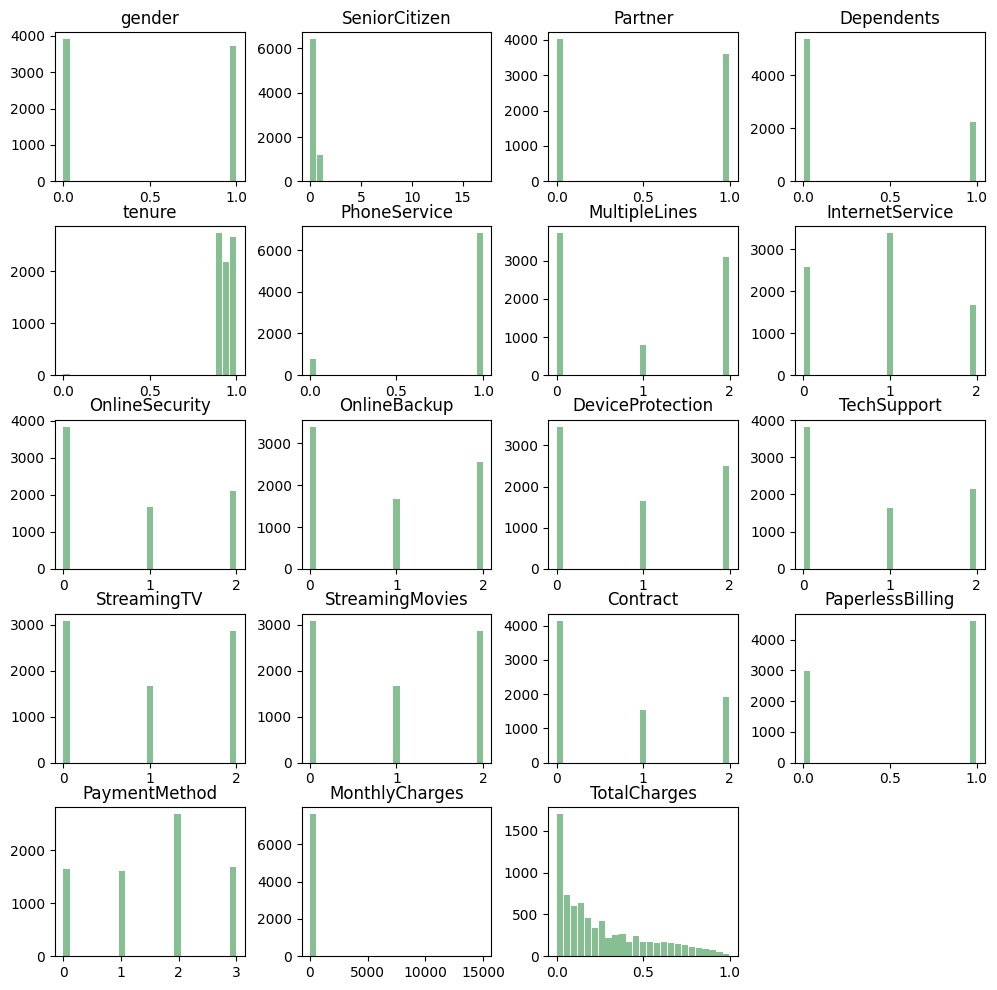

In [91]:
preProcessed_df.hist(bins=25, grid=False, figsize=(12,12), color='#86bf91', zorder=2, rwidth=0.9)
plt.show()

# boxplot

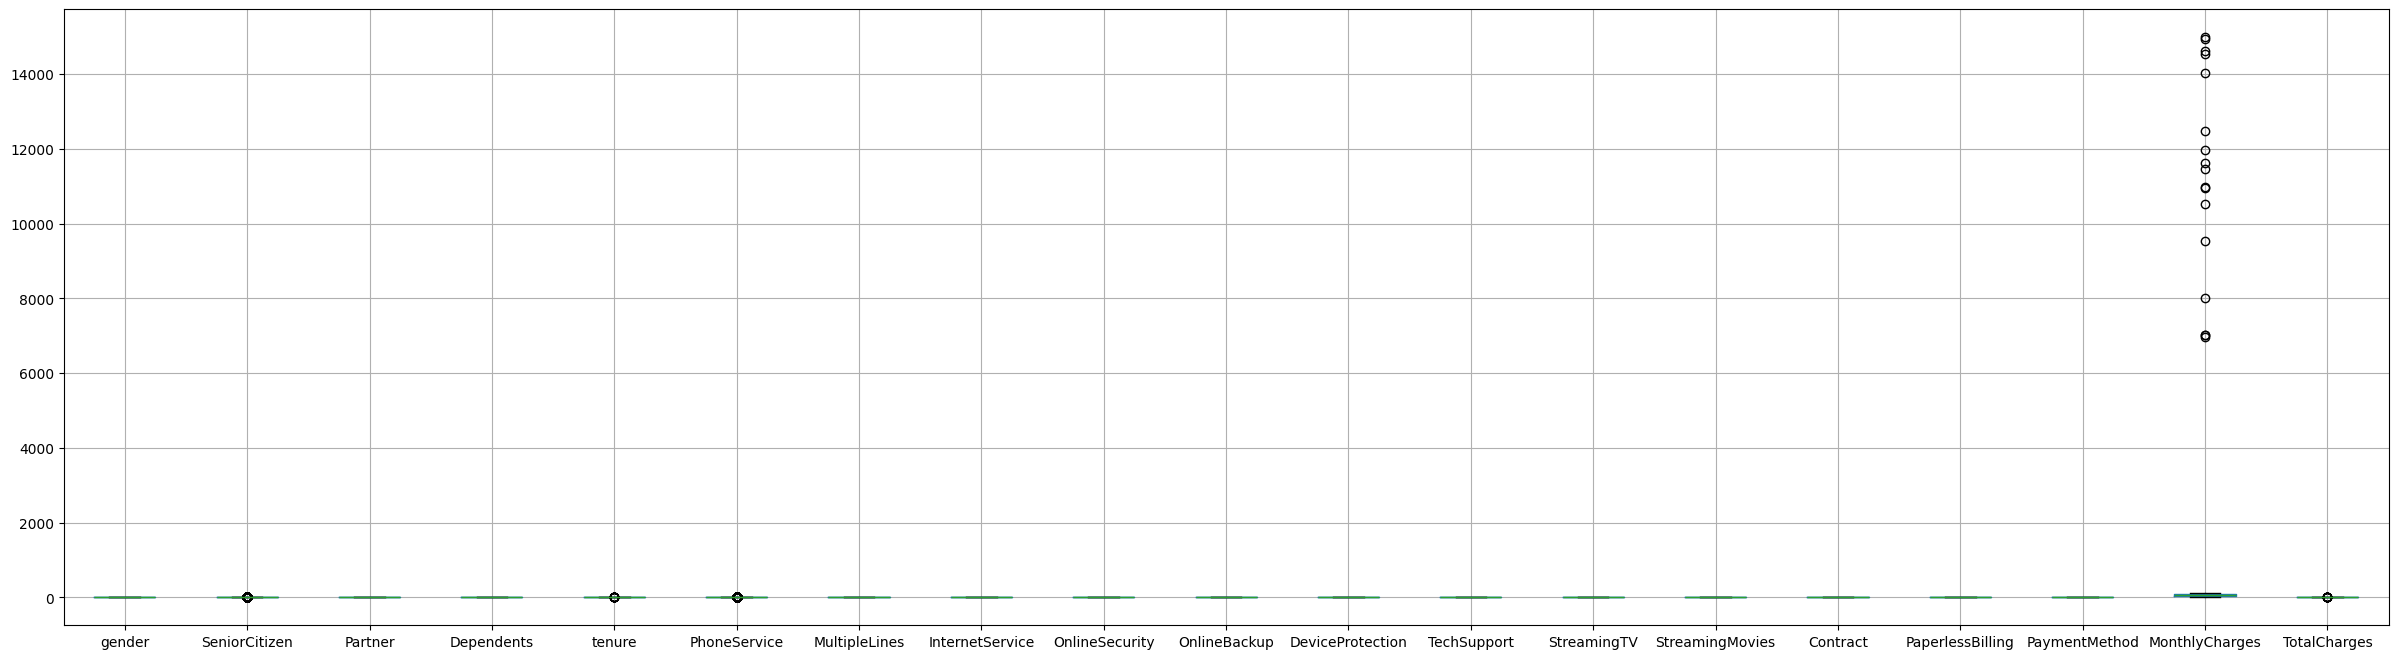

In [92]:
plt.figure(figsize=(30, 8))
preProcessed_df.boxplot()
plt.show()

# scatterplot

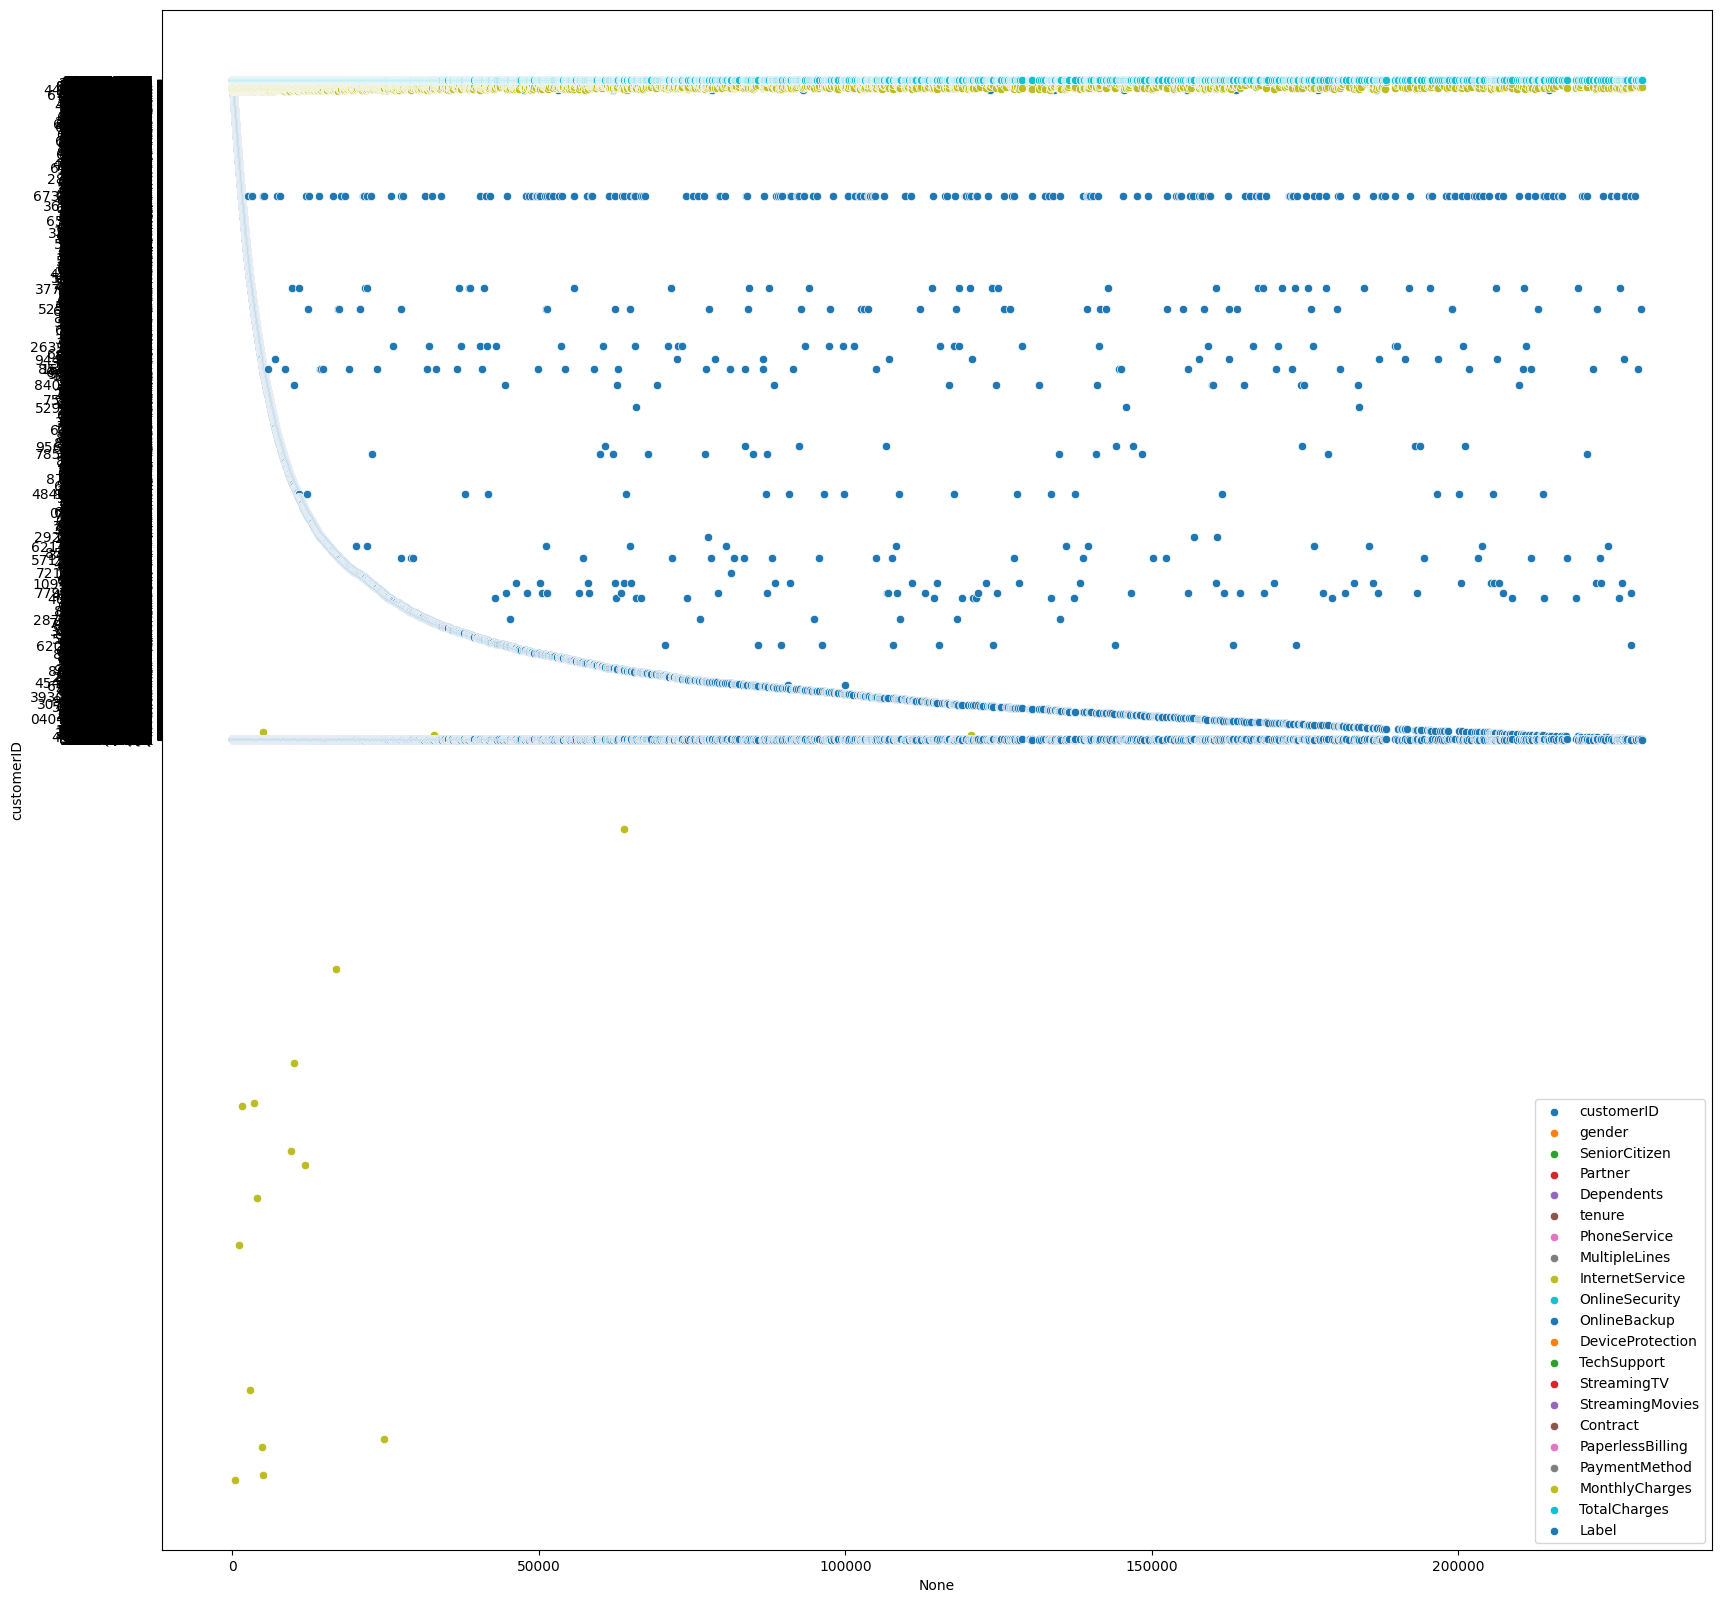

In [93]:
import seaborn as sns
plt.figure(figsize=(20, 20))
for column in preProcessed_df.columns:
    sns.scatterplot(data=preProcessed_df, x=preProcessed_df.index, y=column, label=column)
plt.legend()
plt.show()


# pairplot

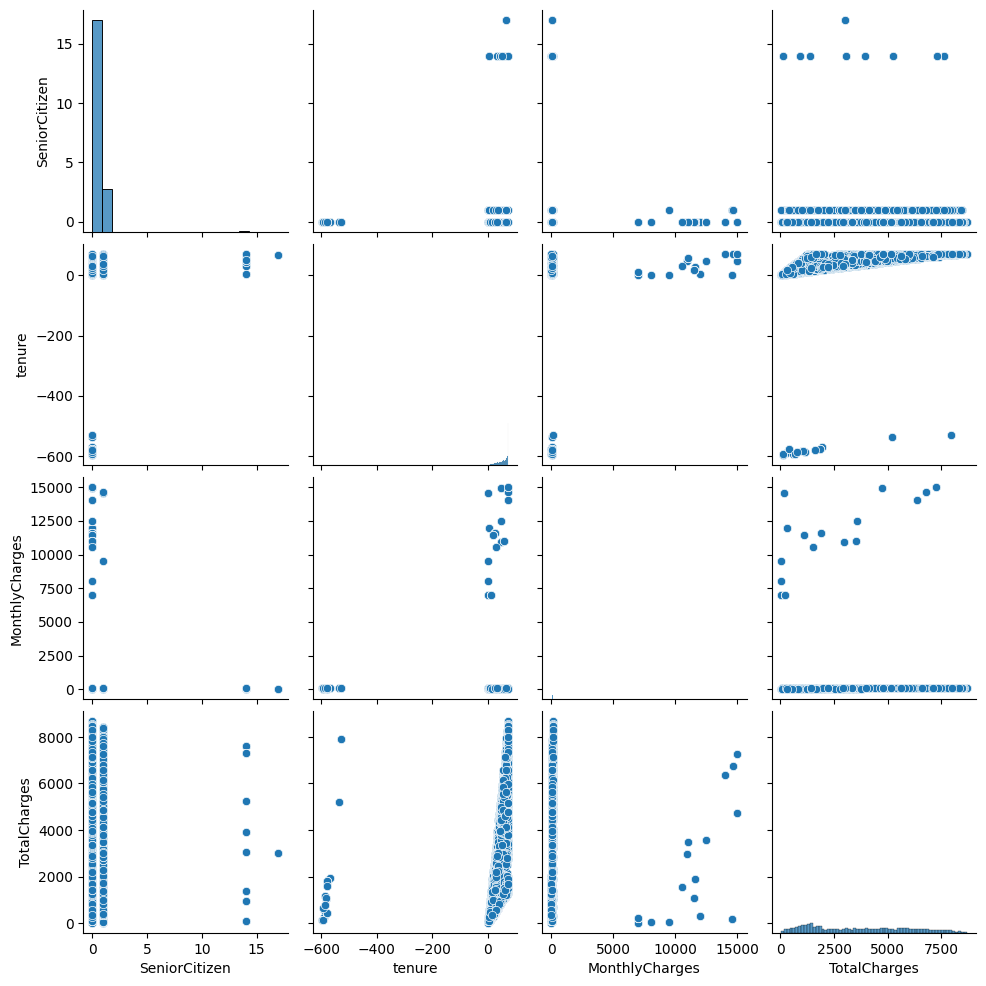

In [94]:
import seaborn as sns
sns.pairplot(df)
plt.show()

# Correlation coefficient

In [16]:
correlation_matrix = preProcessed_df.corr(method='pearson')
correlation_matrix


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
gender,1.000000,0.008364,0.000886,0.000904,0.000788,0.007001,0.003252,-0.008915,0.002055,0.000267,0.003289,0.011880,0.004946,0.004195,-0.001313,-0.016891,0.004028,0.004799,-0.000762
SeniorCitizen,0.008364,1.000000,0.011637,-0.130146,0.028128,-0.021352,0.098879,-0.035000,-0.061420,-0.000601,-0.014931,-0.099947,0.025562,0.026069,-0.078743,0.075191,-0.015802,0.009072,0.078303
Partner,0.000886,0.011637,1.000000,0.450618,0.227990,0.014038,0.146906,0.008730,0.131909,0.152987,0.160654,0.122880,0.137757,0.138962,0.267475,-0.016165,-0.143923,0.019656,0.303667
Dependents,0.000904,-0.130146,0.450618,1.000000,0.073794,-0.010872,-0.020522,0.039456,0.132428,0.095693,0.078620,0.124591,0.054474,0.040199,0.215892,-0.104312,-0.024549,0.002353,0.064092
tenure,0.000788,0.028128,0.227990,0.073794,1.000000,-0.017065,0.215918,-0.011631,0.194229,0.231343,0.221264,0.208656,0.172694,0.182960,0.440852,0.022672,-0.241619,0.010549,0.544558
PhoneService,0.007001,-0.021352,0.014038,-0.010872,-0.017065,1.000000,-0.015300,0.387943,-0.018611,-0.005905,0.030841,-0.009164,0.045405,0.013988,-0.007514,-0.000024,-0.002679,0.021623,0.096287
MultipleLines,0.003252,0.098879,0.146906,-0.020522,0.215918,-0.015300,1.000000,-0.099690,0.004804,0.113425,0.126978,0.007819,0.164908,0.185366,0.084217,0.166921,-0.177865,0.015351,0.434343
InternetService,-0.008915,-0.035000,0.008730,0.039456,-0.011631,0.387943,-0.099690,1.000000,-0.026417,0.028167,0.055034,-0.026483,0.099407,0.081932,0.103502,-0.128008,0.092365,-0.031733,-0.181960
OnlineSecurity,0.002055,-0.061420,0.131909,0.132428,0.194229,-0.018611,0.004804,-0.026417,1.000000,0.174346,0.162496,0.264516,0.047779,0.062815,0.346827,-0.158140,-0.088525,0.004041,0.233821
OnlineBackup,0.000267,-0.000601,0.152987,0.095693,0.231343,-0.005905,0.113425,0.028167,0.174346,1.000000,0.184393,0.185234,0.156801,0.150880,0.251834,-0.009081,-0.105283,0.025490,0.358975


# heatmap

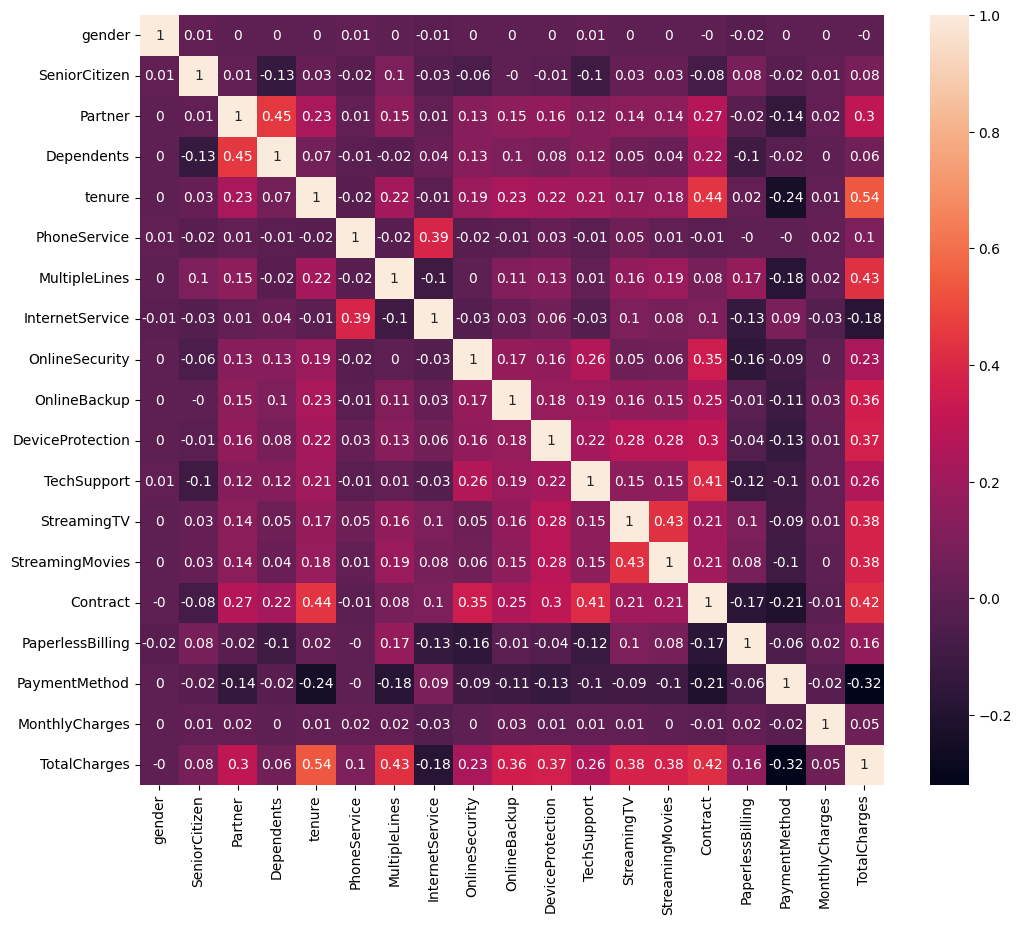

In [17]:
plt.figure(figsize=(12,10))
plt=sns.heatmap(correlation_matrix.round(2),annot=True)

# sensitivity analysis

In [24]:
def my_model(x_1, x_2):
    """
    Represents the model function
    """
    return x_1 ** x_2

In [36]:
from sensitivity import SensitivityAnalyzer

dict_={
    'x_1':preProcessed_df["gender"],
    'x_2':preProcessed_df["SeniorCitizen"]
}


In [ ]:
sa = SensitivityAnalyzer(dict_, my_model)

  0%|▏                                                                   | 178629/57957769 [03:23<32:43:37, 490.41it/s]

# Principal Component Analysis (PCA) 

In [51]:
from sklearn.decomposition import PCA
def PCA_Handler(preProcessed_df):
    preProcessed_df=preProcessed_df.drop(columns=['customerID','Label'])
    pca = PCA(n_components=5)
    pca.fit(preProcessed_df)
    principalComponents = pca.transform(preProcessed_df)
    principal_df = pd.DataFrame(data=principalComponents, columns=['PCA%i' % i for i in range(1, pca.n_components + 1)])
    return principal_df

In [52]:
PCA_Handler(preProcessed_df)

,PCA1,PCA2,PCA3,PCA4,PCA5
0,9.379339,0.696852,1.690760,1.775618,-0.679566
1,4.629201,0.698361,-0.963381,0.932107,0.680085
2,-15.270555,2.355453,-0.618626,-1.934113,-0.321573
3,-40.120622,-1.043357,1.353263,-1.644132,-0.299191
4,18.779388,2.038672,-0.107805,1.578866,0.580128
...,...,...,...,...,...
7608,-39.120835,-0.999201,-0.901237,-1.421336,-0.070064
7609,-69.770743,0.198138,0.227507,-0.904481,-1.532387
7610,-14.120866,-1.723483,-0.240102,-0.189950,-0.691633
7611,-35.070738,0.548015,-0.607596,0.906773,-0.707188


# Model

## Baseline

In [32]:
cv_scores, test_accuracy = logistic_regression_cv(preProcessed_df, 'Label')

if cv_scores is not None:
    print(f"Cross-validation scores: {cv_scores}")
    print(f"Test set accuracy: {test_accuracy}")

# Convert results_list to DataFrame and display as a table
results_df = pd.DataFrame(results_list)
print("\nResults as a table:")
results_df

C:\Users\Abedini\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Abedini\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

Cross-validation scores: [0.8645468  0.86593814 0.86396313 0.86555742 0.86352832]
Test set accuracy: 0.8622560784722947

Results as a table:


,Target Label,Cross-Validation Scores,Test Accuracy
0,Label,"[0.8645467984579264, 0.8659381431345836, 0.863...",0.862256


## Applying Preprocess

In [33]:
# complete the code below to set the preprocessed_df as your preprocessed dataframe
preprocessed_df=df

cv_scores, test_accuracy = logistic_regression_cv(preprocessed_df, 'Label')
result_df=[]
if cv_scores is not None:
    print(f"Cross-validation scores: {cv_scores}")
    print(f"Test set accuracy: {test_accuracy}")

# Convert results_list to DataFrame and display as a table
results_df = pd.DataFrame([{"Label":"Label",
                          "Cross-validation scores":cv_scores,
                          "Test set accuracy":test_accuracy}])
print("\nResults as a table:")
results_df

C:\Users\Abedini\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Abedini\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

Cross-validation scores: [0.8645468  0.86593814 0.86396313 0.86555742 0.86352832]
Test set accuracy: 0.8622560784722947

Results as a table:


,Label,Cross-validation scores,Test set accuracy
0,Label,"[0.8645467984579264, 0.8659381431345836, 0.863...",0.862256
